In [5]:
import pandas as pd
from pandas import Series,DataFrame

from collections import Counter

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sb

In [5]:
#importing dataframe

In [6]:
diabetes = pd.read_csv('C:\\Users\\ashish\\Desktop\\python\\python\\data_sets\\diabetes.csv')


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
Counter(diabetes.Outcome)

Counter({1: 268, 0: 500})

In [7]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(diabetes.iloc[:,:8],diabetes.Outcome)
print('Resampled dataset shape {}'.format(Counter(y_res)))
len(X_tra)

Resampled dataset shape Counter({1: 500, 0: 500})


1000

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
import statsmodels.formula.api as smf
model1= smf.logit('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age',data = diabetes).fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Mon, 08 Jul 2019   Pseudo R-squ.:                  0.2718
Time:                        21:34:30   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

In [11]:
model1_predict = model1.predict(diabetes)

In [12]:
model1_predict.head()

0    0.721727
1    0.048642
2    0.796702
3    0.041625
4    0.902184
dtype: float64

In [13]:
diabetes['attained']=0

In [14]:
diabetes.loc[model1_predict>=.5,'attained']=1

In [15]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,attained
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [16]:
from sklearn.metrics import classification_report
print(classification_report(diabetes.Outcome,diabetes.attained))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

   micro avg       0.78      0.78      0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



In [18]:
#confusion matrix
cm=pd.crosstab(diabetes.Outcome,diabetes.attained)
cm

attained,0,1
Outcome,,
0,445,55
1,112,156


In [19]:
# ROC curve Receiever Operating Characteristic curve
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(diabetes.Outcome, model1_predict)


Text(0, 0.5, 'True Positive')

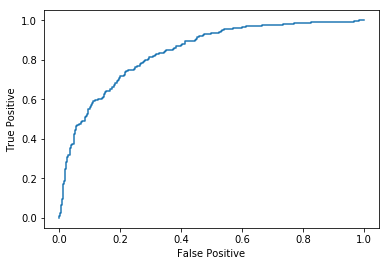

In [23]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")

In [24]:
#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(diabetes.Outcome, diabetes.attained)

0.7825520833333334

In [25]:
from sklearn.model_selection import train_test_split
diabetes_train, diabetes_test = train_test_split(diabetes,test_size=0.3)

In [26]:
diabetes_train.drop(['attained'],axis=1,inplace=True)

In [27]:
diabetes_train .head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
700,2,122,76,27,200,35.9,0.483,26,0
738,2,99,60,17,160,36.6,0.453,21,0
16,0,118,84,47,230,45.8,0.551,31,1
413,1,143,74,22,61,26.2,0.256,21,0
456,1,135,54,0,0,26.7,0.687,62,0


In [28]:
model_train = smf.logit('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age',data=diabetes_train).fit()

Optimization terminated successfully.
         Current function value: 0.479049
         Iterations 6


In [29]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Jul 2019   Pseudo R-squ.:                  0.2588
Time:                        19:32:53   Log-Likelihood:                -257.25
converged:                       True   LL-Null:                       -347.09
                                        LLR p-value:                 1.205e-34
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.1531      0.836     -9.752      0.000      -9.792      -6.514
Pregnancies                  0.1248      0.038      3.278      0.001       0.050       0.199
Glucose                      0.0363      0.004      8.082      0.000       0.028       0.045
BloodPressure               -0.0120      0.006     -1.938      0.053      -0.024       0.000
SkinThickness                0.0034      0.008      0.401      0.689      -0.013       0.020
Insulin                     -0.0016      0.001     -1.410      0.159      -0.004       0.001
BMI                          0.0857      0.018      4.813      0.000       0.051       0.121
DiabetesPedigreeFunction     0.5570      0.344      1.619      0.105      -0.117       1.231
Age                          0.0101      0.011      0.908      0.364      -0.012       0.032
============================================================================================
"""

In [30]:
train_predict = model_train.predict(diabetes_train)
train_predict.head()

700    0.266639
738    0.163682
16     0.366372
413    0.240968
456    0.383645
dtype: float64

In [31]:
diabetes_train['train_predict']=0
diabetes_train.loc[train_predict >=0.5,'train_predict']=1

In [32]:
diabetes_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,train_predict
700,2,122,76,27,200,35.9,0.483,26,0,0
738,2,99,60,17,160,36.6,0.453,21,0,0
16,0,118,84,47,230,45.8,0.551,31,1,0
413,1,143,74,22,61,26.2,0.256,21,0,0
456,1,135,54,0,0,26.7,0.687,62,0,0


In [33]:
from sklearn.metrics import classification_report
print(classification_report(diabetes_train.Outcome,diabetes_train.train_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       350
           1       0.70      0.53      0.61       187

   micro avg       0.76      0.76      0.76       537
   macro avg       0.74      0.71      0.72       537
weighted avg       0.75      0.76      0.75       537



In [34]:
cm_train = pd.crosstab(diabetes_train.Outcome,diabetes_train.train_predict)
cm_train

train_predict,0,1
Outcome,,
0,308,42
1,87,100


Text(0, 0.5, 'True Positive')

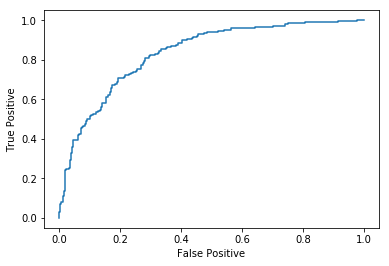

In [35]:
fpr, tpr, threshold = metrics.roc_curve(diabetes_train.Outcome, train_predict)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(diabetes_train.Outcome, diabetes_train.train_predict)

0.7597765363128491

In [37]:
test_predict = model_train.predict(diabetes_test)
test_predict.head()

563    0.161548
42     0.128967
364    0.477931
424    0.815533
440    0.758578
dtype: float64

In [38]:
diabetes_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,attained
563,6,99,60,19,54,26.9,0.497,32,0,0
42,7,106,92,18,0,22.7,0.235,48,0,0
364,4,147,74,25,293,34.9,0.385,30,0,0
424,8,151,78,32,210,42.9,0.516,36,1,1
440,0,189,104,25,0,34.3,0.435,41,1,1


In [39]:
diabetes_test['test_predict']=0
diabetes_test.loc[test_predict >= 0.5,'test_predict']=1

In [40]:
diabetes_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,attained,test_predict
563,6,99,60,19,54,26.9,0.497,32,0,0,0
42,7,106,92,18,0,22.7,0.235,48,0,0,0
364,4,147,74,25,293,34.9,0.385,30,0,0,0
424,8,151,78,32,210,42.9,0.516,36,1,1,1
440,0,189,104,25,0,34.3,0.435,41,1,1,1


In [41]:
from sklearn.metrics import classification_report
print(classification_report(diabetes_test.Outcome,diabetes_test.test_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       150
           1       0.76      0.68      0.72        81

   micro avg       0.81      0.81      0.81       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231



In [42]:
cm_test = pd.crosstab(diabetes_test.Outcome,diabetes_test.test_predict)
cm_test

test_predict,0,1
Outcome,,
0,133,17
1,26,55


Text(0, 0.5, 'True Positive')

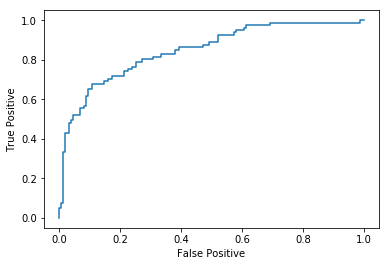

In [43]:
fpr, tpr, threshold = metrics.roc_curve(diabetes_test.Outcome, test_predict)
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(diabetes_test.Outcome, diabetes_test.test_predict)

0.8138528138528138